# TP 3 Logistic Regression

In [1]:
# Title: Régression et sélection de variables
# Author: MDS, VSE, CNN
# Date: current date

# In this document, we seek to understand the relationships between a set of biological markers
# and the severity of diabetes using the LASSO regression method.

# Importing necessary packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV, Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# List of main Python commands for LASSO:
# * Lasso(alpha=0.1): LASSO regression of y on x with the sparsity parameter lambda
# * LassoCV(cv=5): Implements K-fold cross-validation to determine the optimal sparsity parameter
# * coef_ : returns the coefficients of the model
# * predict : predicts new values based on the model

# Dataset description: 
# The `diabetes` dataset describes 442 patients with 10 explanatory variables, as follows:
# - X_1 = age
# - X_2 = sex
# - X_3 = BMI (Body Mass Index)
# - X_4 = average blood pressure
# - X_5 = total cholesterol (tc)
# - X_6 = LDL cholesterol (ldl - bad cholesterol)
# - X_7 = HDL cholesterol (hdl - good cholesterol)
# - X_8 = tch
# - X_9 = ltc
# - X_10 = glucose
# - y: indicator of diabetes progression measured one year after data collection

# Dataset is available in `sklearn.datasets` for Python

In [3]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

X = data.data
y = data.target

print(pd.DataFrame(X).describe())

                  0             1             2             3             4  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                  5             6             7             8             9  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

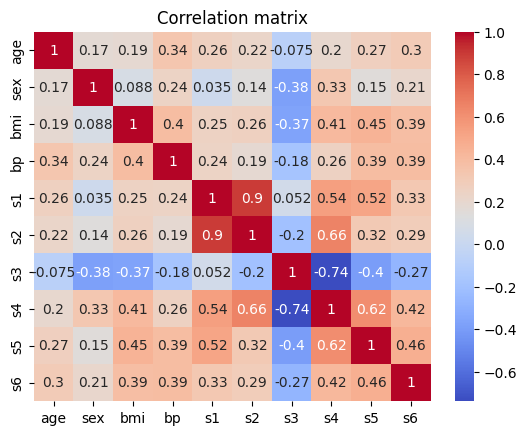

In [4]:
# Correlation matrix

corr_matrix = np.corrcoef(X, rowvar=False)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", xticklabels=data.feature_names, yticklabels=data.feature_names)
plt.title("Correlation matrix")
plt.show()

Explained variance tells you how much of the total variance in the dataset is captured by each principal component.

The first component captures the most variance, the second the next highest, and so on. The idea is that with just a few components, you can explain most of the variability in the data.

For instance, if the first two components explain 80% of the variance, you can reduce the dataset to two dimensions and still retain much of the original structure.

In [5]:
# Perform PCA for exploratory data analysis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Summary of PCA
explained_variance = pca.explained_variance_ratio_
print("Explained variance by components: ", explained_variance)

Explained variance by components:  [0.40242108 0.14923197 0.12059663 0.09554764 0.06621814 0.06027171
 0.05365657 0.0433682  0.007832   0.00085607]


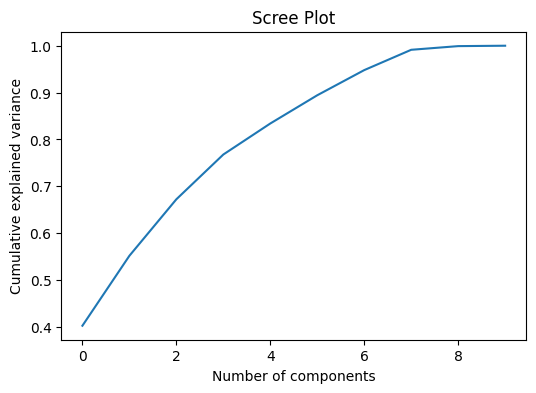

In [6]:
# Scree plot to visualize variance captured by principal components
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(explained_variance))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Scree Plot")
plt.show()

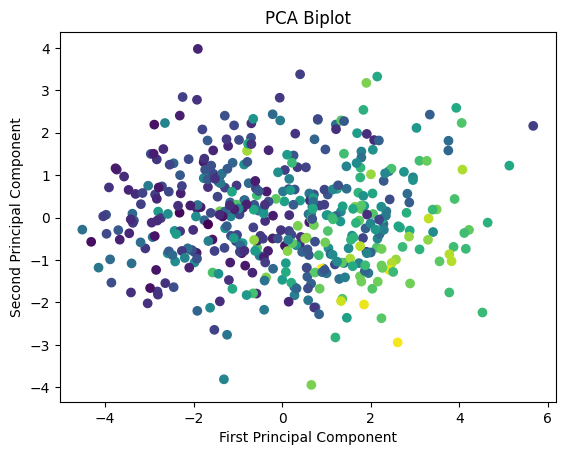

In [7]:
# PCA biplot (first two principal components)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA Biplot")
plt.show()

## Lasso Regression

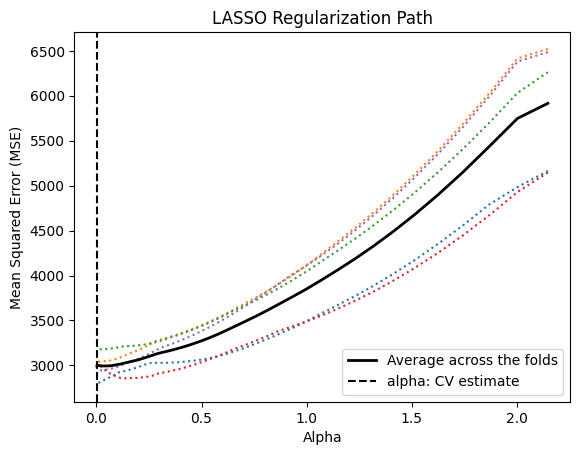

In [17]:
# LASSO Regression
# Visualize the regularization path
lasso = LassoCV(cv=5, random_state=0).fit(X, y)
alphas = lasso.alphas_

plt.plot(alphas, lasso.mse_path_, ':')
plt.plot(alphas, lasso.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(lasso.alpha_, linestyle='--', color='k', label='alpha: CV estimate')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('LASSO Regularization Path')
plt.show()

In [18]:
# Optimal coefficients (lambda chosen by cross-validation)
print("Coefficients: ", lasso.coef_)

Coefficients:  [  -6.49469328 -235.99308032  521.7443693   321.0607768  -569.43813385
  302.45319289   -0.          143.69851474  669.92267515   66.83551067]


In [19]:
# Predicted vs. observed
yhat = lasso.predict(X)
correlation = np.corrcoef(y, yhat)[0, 1]
print(f"Correlation between observed and predicted values: {correlation}")

Correlation between observed and predicted values: 0.7193242577892726


## Ridge Regression

In [11]:
# Ridge regression for comparison
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(cv=5).fit(X, y)

# Regularization path for Ridge
alphas_ridge = ridge.alpha_

# Ridge predictions
yhat_ridge = ridge.predict(X)
correlation_ridge = np.corrcoef(y, yhat_ridge)[0, 1]
print(f"Correlation between observed and predicted values (Ridge): {correlation_ridge}")

Correlation between observed and predicted values (Ridge): 0.7168295686182574
